## Data Fundamentals (H)
# Week 4: Computational Linear Algebra I 
## Supplement: homogenous coordinates
----
 ##### DF(H) - University of Glasgow - John H. Williamson - 2017

In [23]:
# standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(10.0, 6.0), dpi=140)
from utils.matrices import show_matrix_effect, print_matrix

# Homogeneous coordinates
There is one kind of "rigid" transformation that we can't express as a matrix: a **translation**, that is a *shifting* of points. This can never be expressed as a matrix, because we know that the origin will never move under a linear map:
$$ \newcommand{\vec}[1]{ {\bf #1} } $$
$$A\vec{0} = \vec{0}$$

We can apply a translation to a vector using vector addition. The form:
$$A\vec{x} + \vec{b}$$
allows for both linear maps (defined by $A$) and for translations (defined by the vector $\vec{b}$).

However, it is often convenient to be able to do *all* operations with matrix multiplies. This is true in graphics engines, for example, or in neural network libraries. This avoids the awkward extra step of adding on a vector to perform translations, and can make it easier to vectorise code. 

The solution is to use **homogenous coordinates**. 

Homogeneous coordinates are widely used in computer graphics (e.g. a GPU has special operations for 4x4 matrices so that it can perform homogeneous transforms on 3D points). 

The same concept is also used in machine learning, where a **bias term** is used to allow a linear map to "move away" from the origin. Instead of awkwardly adding a vector to the transformation, the whole operation can be expressed as a single matrix multiplication using homogeneous coordinates.

## Applying homogeneous coordinates

We expand our matrix $A$, adding on one extra row to the bottom and one extra column to the right to produce $A^\prime$. The bottom row of $A$ is all zeros except for a 1 in the rightmost position. The translation of the vector to be applied is placed in the rightmost column. 

So if we originally had a matrix
$$A=\begin{bmatrix}
2 & 0 \\
0 & 0.5 \\
\end{bmatrix}$$ (which just scales the first coordinate by 2 and the second by 0.5)
we would convert it to:


$$A^\prime = \begin{bmatrix}
2 & 0 & x\\
0 & 0.5 & y\\
0 & 0 & 1 \\
\end{bmatrix},$$
where $x$ and $y$ were the offsets (translations) we wanted to apply.

Then, instead of the product $Ax$, we compute $A^\prime \vec{x^\prime},$ where
$\vec{x^\prime}$ is just the vector $\vec{x}$ with a 1 appended to it. If 

$$ \vec{x} = \begin{bmatrix} 4 & 10 \end{bmatrix}$$ then

$$ \vec{x^\prime} =  \begin{bmatrix} 4 & 10 & 1 \end{bmatrix} $$

We then discard the last component of the result after the multiplication $A^\prime \vec{x^\prime}$.


In [ ]:
A = np.array([[2, 0], [0, 0.5]])
b = np.array([-0.5, 0.25])

In [17]:
def homogenize(A, b):
    ## homogeneous version
    # pad the bottom and right with zeros
    Ap = np.zeros((A.shape[0] + 1, A.shape[1] + 1))    
    Ap[:A.shape[0], :A.shape[1]] = A
    
    # put b in the rightmost column
    Ap[:-1, -1] = b
    # set the bottom right to 1
    Ap[-1, -1] = 1
    return Ap

In [26]:
print_matrix("A", A)
print_matrix("{\\bf b}", b)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
# homogenise a
Ap = homogenize(A, b)
print_matrix("A^\prime", Ap)

<IPython.core.display.Latex object>

In [29]:
x = np.array([2, 1])
print_matrix("{\\bf x}", x)
xp = np.concatenate([x, [1]])
print_matrix("{\\bf x^\prime}", xp)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [30]:
print_matrix("A{\\bf x}+b", np.dot(A, x) + b)

# multiply then remove last component
print_matrix("A^\prime {\\bf x^\prime}", (Ap @ xp)[:-1])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

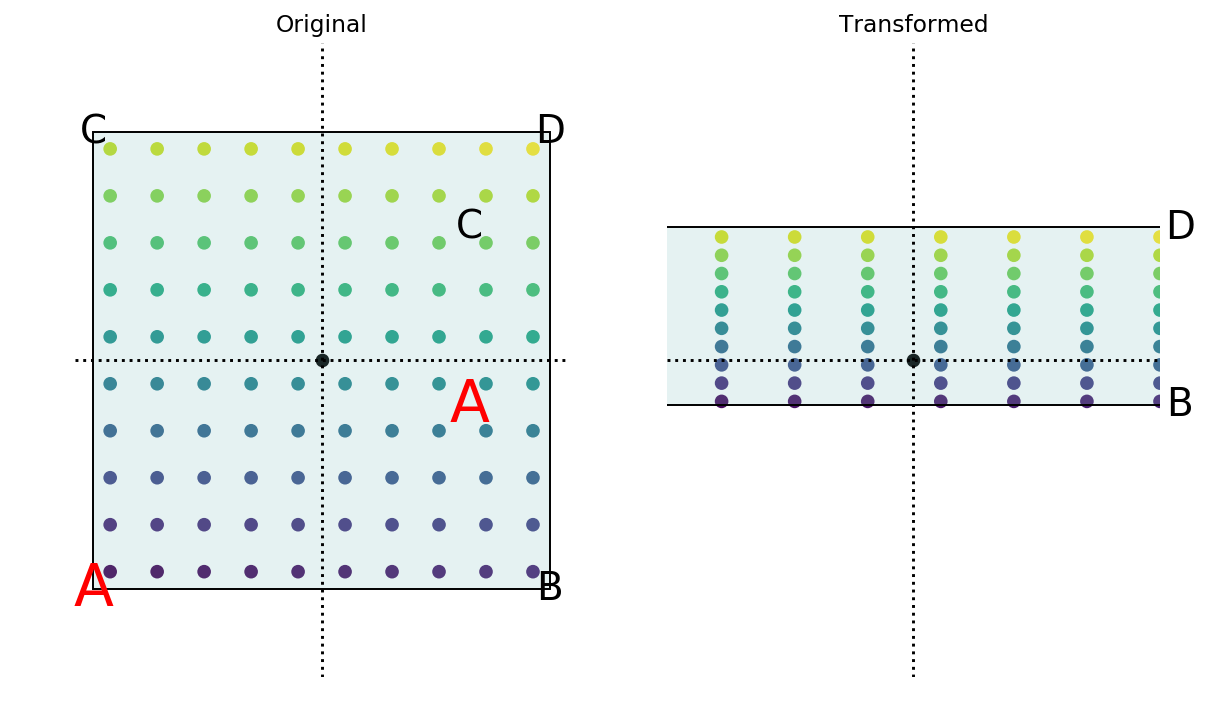

In [31]:
# show the effect visually
show_matrix_effect(Ap)